In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [2]:
# Data Load
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data
target = iris.target

In [3]:
data = data[target !=0, :2] # 1, 2번 데이터만 사용
target = target[target !=0]

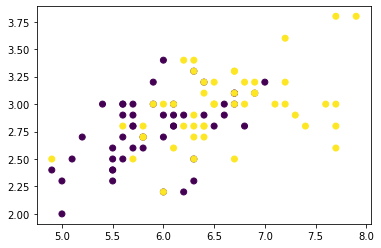

In [4]:
plt.scatter(data[:, 0], data[:, 1], c=target)

In [5]:
# Data Split
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.9, random_state=2021
)

In [6]:
# Linear Kernel
from sklearn.svm import SVC

In [7]:
linear_svc = SVC(kernel="linear")

In [8]:
# 학습
linear_svc.fit(train_data, train_target)

SVC(kernel='linear')

In [9]:
# 시각화 함수 정의
def plot_support_vector_machine(svm):
    # 전체 데이터
    plt.scatter(data[:, 0], data[:, 1], c=target, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    # test 데이터
    plt.scatter(test_data[:, 0], test_data[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = data[:, 0].min()
    x_max = data[:, 0].max()
    y_min = data[:, 1].min()
    y_max = data[:, 1].max()
    
    # 영역 칠하기
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading="auto")
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

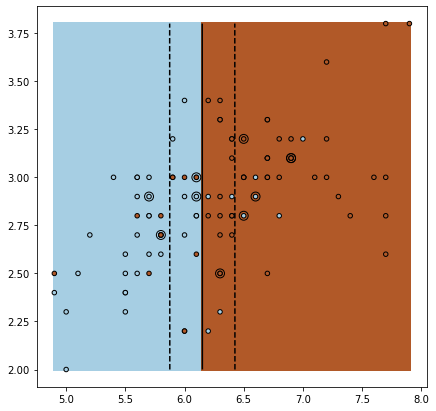

In [10]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(linear_svc)
# Dicision boundary : 검은색 직선
# Support vector : 검은색 점선

In [11]:
# Kernel Mapping
# Poly Kernel
# 직선을 곡선으로 mapping
# gamma: 결정 경계를 스케일링, degree: 몇차원의 곡선으로 맵핑할지 결정

In [12]:
poly_svc = SVC(kernel="poly")

In [13]:
poly_svc.fit(train_data, train_target)

SVC(kernel='poly')

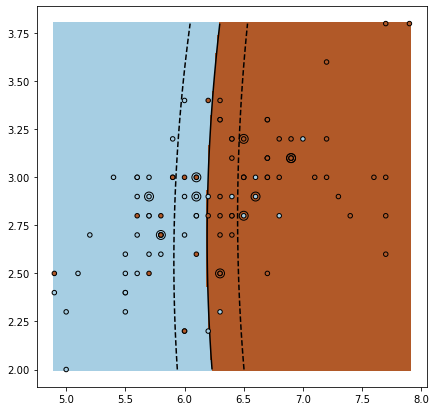

In [14]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

In [15]:
# gamma = 0.1
poly_svc = SVC(kernel="poly", gamma=0.1)
poly_svc.fit(train_data, train_target)

SVC(gamma=0.1, kernel='poly')

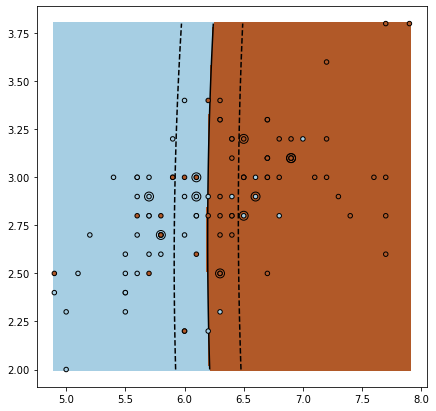

In [16]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

In [17]:
# gamma = 10
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)

SVC(gamma=10, kernel='poly')

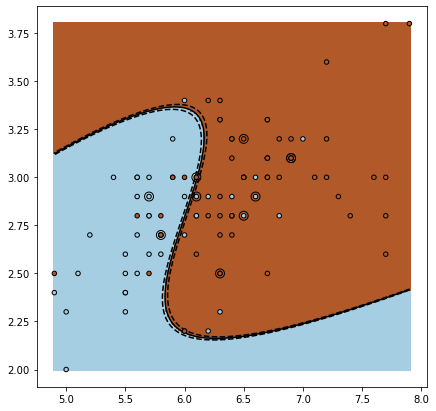

In [18]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

In [19]:
# degree = 2
poly_svc = SVC(kernel="poly", gamma=10, degree=2)
poly_svc.fit(train_data, train_target)

SVC(degree=2, gamma=10, kernel='poly')

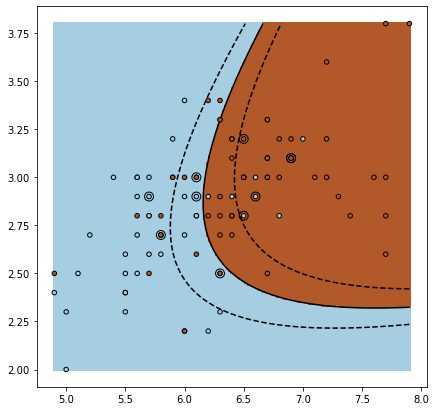

In [20]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

In [21]:
# degree = 4
poly_svc = SVC(kernel="poly", gamma=10, degree=4)
poly_svc.fit(train_data, train_target)

SVC(degree=4, gamma=10, kernel='poly')

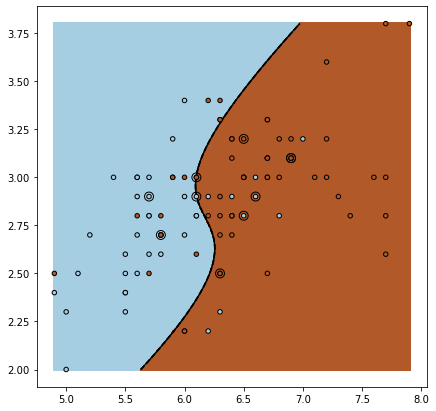

In [22]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

In [23]:
# RBF Kernel
# 데이터를 고차원의 공간으로 mapping
# gamma값으로 스케일링

In [24]:
rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(train_data, train_target)

SVC()

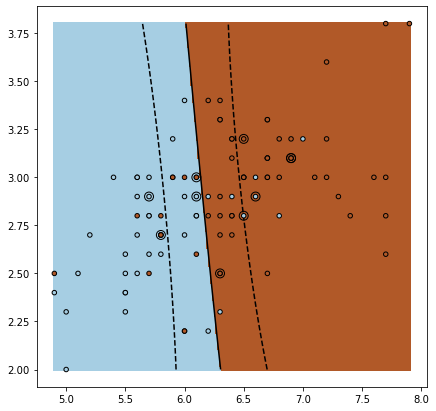

In [25]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

In [26]:
# gamma = 0.1
rbf_svc = SVC(kernel="rbf", gamma=0.1)
rbf_svc.fit(train_data, train_target)

SVC(gamma=0.1)

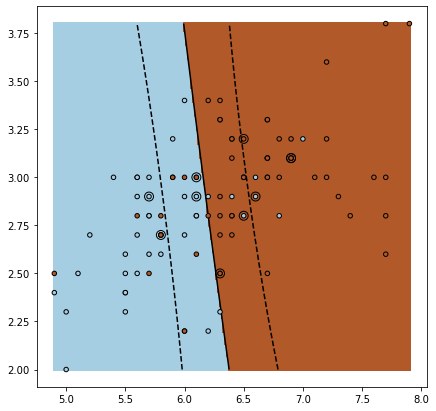

In [27]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

In [28]:
# gamma = 10
rbf_svc = SVC(kernel="rbf", gamma=10)
rbf_svc.fit(train_data, train_target)

SVC(gamma=10)

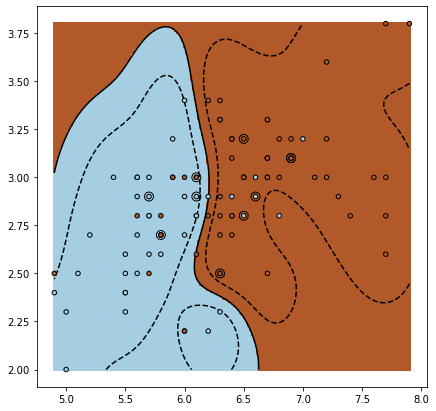

In [29]:
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

In [30]:
# Penalty
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)

SVC(gamma=10, kernel='poly')

In [31]:
# C = 100
hard_penalty_poly_svc = SVC(kernel="poly", gamma=10, C=100)
hard_penalty_poly_svc.fit(train_data, train_target)

SVC(C=100, gamma=10, kernel='poly')

Text(0.5, 1.0, 'Hard penalty')

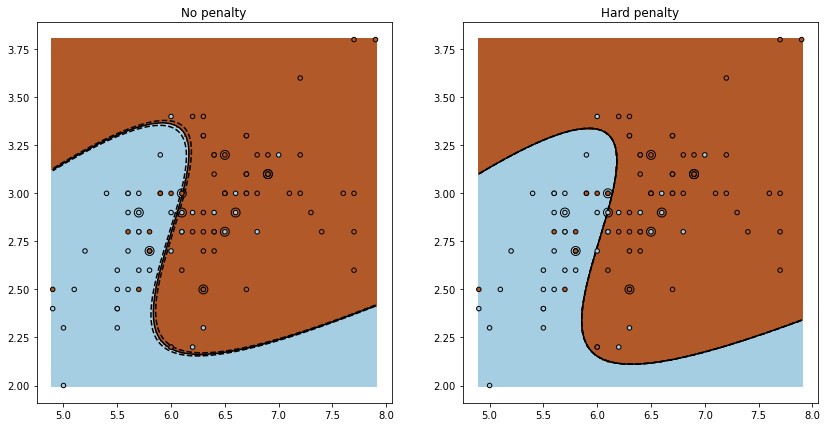

In [32]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
plot_support_vector_machine(poly_svc)
plt.title("No penalty")
plt.subplot(1,2,2)
plot_support_vector_machine(hard_penalty_poly_svc)
plt.title("Hard penalty")

In [33]:
# RBF
rbf_svc = SVC(kernel="rbf", gamma=10)
rbf_svc.fit(train_data, train_target)

SVC(gamma=10)

In [34]:
hard_penalty_svc = SVC(kernel="rbf", gamma=10, C=100)
hard_penalty_svc.fit(train_data, train_target)

SVC(C=100, gamma=10)

Text(0.5, 1.0, 'Hard penalty')

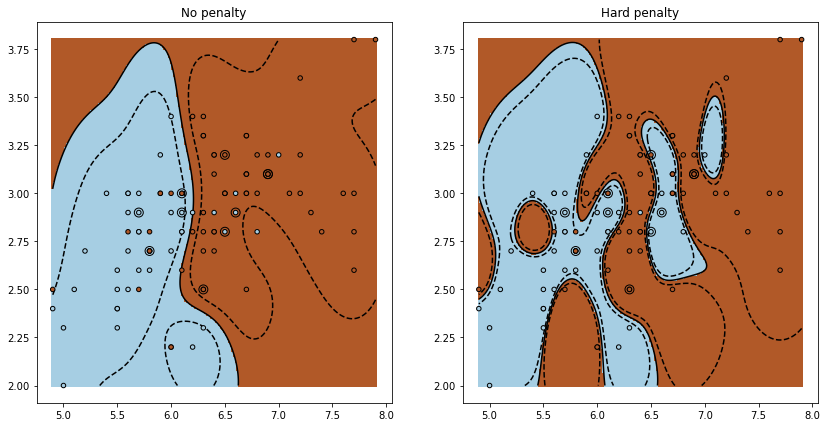

In [35]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
plot_support_vector_machine(rbf_svc)
plt.title("No penalty")
plt.subplot(1,2,2)
plot_support_vector_machine(hard_penalty_svc)
plt.title("Hard penalty")